In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = r'C:\Users\Sylvia\PythonAssignment\ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = r'C:\Users\Sylvia\PythonAssignment\ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

data = (data - data.mean()) / data.std()
data.head()

#代价函数
def computeCost(X,y,Z): 
    inner = np.power(((X*Z.T)-y),2)
    return np.sum(inner)/(2*len(X)) 

#迭代函数
def gradientDescennt(X,y,Z,alpha,iterations):    
    temp = np.matrix(np.zeros(Z.shape)) #零矩阵
    parameters = int(Z.ravel().shape[1])    
    cost = np.zeros(iterations) 
    
    #进行迭代
    for i in range(iterations):  
        error = (X*Z.T)-y  
        for j in range(parameters): 
            term = np.multiply(error,X[:,j])    
            temp[0,j] = Z[0,j] - (alpha/len(X))*np.sum(term)    

        Z = temp    
        cost[i] = computeCost(X,y,Z)    

    return Z, cost

data.insert(0,'Ones',1)

cols = data.shape[1]    
X = data.iloc[:,0:cols-1]   
y = data.iloc[:,cols-1:cols]    

X = np.matrix(X.values)
y = np.matrix(y.values)
Z = np.matrix(np.array([0,0,0]))

alpha = 0.01
iterations = 1000

#获取迭代后的Z值，和代价函数最小值
g,cost = gradientDescennt(X,y,Z,alpha,iterations)    
final_cost = computeCost(X,y,g)
print(final_cost)

0.13070336960771892


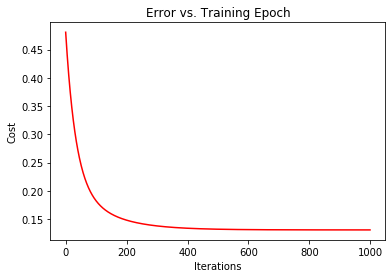

In [9]:
fig, ax = plt.subplots()   
ax.plot(np.arange(iterations),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title("Error vs. Training Epoch")
plt.show()